In [224]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,1
1513,Conservative,73,2,2,4,4,8,2,1
1514,Labour,37,3,3,5,4,2,2,1
1515,Conservative,61,3,3,1,4,11,2,1


In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
df_unscaled = df.copy()
df_unscaled

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,1
1513,Conservative,73,2,2,4,4,8,2,1
1514,Labour,37,3,3,5,4,2,2,1
1515,Conservative,61,3,3,1,4,11,2,1


In [227]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [229]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
532,1.078284,-0.274403,-0.137087,0.557983,-0.625062,1.316728,-1.417763,-0.917613
706,0.181786,0.858443,1.986262,0.557983,-1.441798,-1.148833,0.422294,-0.917613
1140,-1.931388,-0.274403,0.924587,-1.180695,1.008412,1.316728,-1.417763,1.089784
1077,-0.714712,0.858443,0.924587,-1.180695,0.191675,-0.532443,-1.417763,1.089784
954,-1.098925,-0.274403,-1.198761,0.557983,-0.625062,0.083948,0.422294,1.089784
...,...,...,...,...,...,...,...,...
512,1.654605,-1.407249,-1.198761,-1.180695,1.008412,0.083948,0.422294,1.089784
825,-1.739281,-0.274403,-0.137087,-1.180695,1.008412,-0.532443,0.422294,-0.917613
348,0.117751,0.858443,-1.198761,1.427322,-0.625062,-1.765223,0.422294,-0.917613
1241,1.334427,0.858443,-0.137087,0.557983,1.825149,0.083948,1.342323,-0.917613


In [230]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
273,1.078284,-1.407249,-0.137087,0.557983,-0.625062,1.316728,-1.417763,-0.917613
765,-1.483139,-1.407249,-1.198761,-1.180695,1.008412,-0.532443,0.422294,1.089784
415,-1.226997,0.858443,-0.137087,-1.180695,-1.441798,0.083948,0.422294,1.089784
1029,-1.291032,0.858443,0.924587,0.557983,-0.625062,0.083948,-1.417763,-0.917613
506,-0.906819,-0.274403,0.924587,0.557983,-0.625062,0.083948,1.342323,1.089784
...,...,...,...,...,...,...,...,...
653,0.181786,0.858443,0.924587,0.557983,-0.625062,1.316728,-1.417763,-0.917613
504,0.950213,-0.274403,0.924587,-1.180695,1.008412,0.700338,0.422294,1.089784
1423,1.526533,-0.274403,-0.137087,1.427322,-0.625062,-1.148833,-1.417763,-0.917613
886,-1.226997,-0.274403,0.924587,-1.180695,1.008412,1.316728,-1.417763,1.089784


In [231]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
532,1.078284,3,3,4,2,11,0,0
706,0.181786,4,5,4,1,3,2,0
1140,-1.931388,3,4,2,4,11,0,1
1077,-0.714712,4,4,2,3,5,0,1
954,-1.098925,3,2,4,2,7,2,1
...,...,...,...,...,...,...,...,...
512,1.654605,2,2,2,4,7,2,1
825,-1.739281,3,3,2,4,5,2,0
348,0.117751,4,2,5,2,1,2,0
1241,1.334427,4,3,4,5,7,3,0


In [232]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
273,1.078284,2,3,4,2,11,0,0
765,-1.483139,2,2,2,4,5,2,1
415,-1.226997,4,3,2,1,7,2,1
1029,-1.291032,4,4,4,2,7,0,0
506,-0.906819,3,4,4,2,7,3,1
...,...,...,...,...,...,...,...,...
653,0.181786,4,4,4,2,11,0,0
504,0.950213,3,4,2,4,9,2,1
1423,1.526533,3,3,5,2,3,0,0
886,-1.226997,3,4,2,4,11,0,1


In [233]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [234]:
model.score(X_train, y_train)

0.822808671065033

In [235]:
model.score(X_test, y_test)

0.8530701754385965

In [236]:
model=clf.fit(X_train_scaled,y_train)
model.score(X_train_scaled, y_train)

0.822808671065033

In [237]:
model.score(X_test_scaled, y_test)

0.8530701754385965

In [238]:
model=clf.fit(X_train_age_scaled,y_train)
model.score(X_train_age_scaled, y_train)

0.822808671065033

In [239]:
model.score(X_test_age_scaled, y_test)

0.8530701754385965

In [240]:
from sklearn import preprocessing
x = X_train.values    # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_norm = pd.DataFrame(x_scaled,columns=X_train.columns)
X_train_norm

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.681159,0.50,0.50,0.75,0.25,1.0,0.000000,0.0
1,0.478261,0.75,1.00,0.75,0.00,0.2,0.666667,0.0
2,0.000000,0.50,0.75,0.25,0.75,1.0,0.000000,1.0
3,0.275362,0.75,0.75,0.25,0.50,0.4,0.000000,1.0
4,0.188406,0.50,0.25,0.75,0.25,0.6,0.666667,1.0
...,...,...,...,...,...,...,...,...
1056,0.811594,0.25,0.25,0.25,0.75,0.6,0.666667,1.0
1057,0.043478,0.50,0.50,0.25,0.75,0.4,0.666667,0.0
1058,0.463768,0.75,0.25,1.00,0.25,0.0,0.666667,0.0
1059,0.739130,0.75,0.50,0.75,1.00,0.6,1.000000,0.0


In [241]:
x = X_test.values
x_scaled = min_max_scaler.transform(x)
X_test_norm = pd.DataFrame(x_scaled,columns=X_test.columns)
X_test_norm

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.681159,0.25,0.50,0.75,0.25,1.0,0.000000,0.0
1,0.101449,0.25,0.25,0.25,0.75,0.4,0.666667,1.0
2,0.159420,0.75,0.50,0.25,0.00,0.6,0.666667,1.0
3,0.144928,0.75,0.75,0.75,0.25,0.6,0.000000,0.0
4,0.231884,0.50,0.75,0.75,0.25,0.6,1.000000,1.0
...,...,...,...,...,...,...,...,...
451,0.478261,0.75,0.75,0.75,0.25,1.0,0.000000,0.0
452,0.652174,0.50,0.75,0.25,0.75,0.8,0.666667,1.0
453,0.782609,0.50,0.50,1.00,0.25,0.2,0.000000,0.0
454,0.159420,0.50,0.75,0.25,0.75,1.0,0.000000,1.0


In [242]:
X_train_age_norm = X_train.copy()
X_train_age_norm['age'] = (X_train['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_train_age_norm

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
532,0.681159,3,3,4,2,11,0,0
706,0.478261,4,5,4,1,3,2,0
1140,0.000000,3,4,2,4,11,0,1
1077,0.275362,4,4,2,3,5,0,1
954,0.188406,3,2,4,2,7,2,1
...,...,...,...,...,...,...,...,...
512,0.811594,2,2,2,4,7,2,1
825,0.043478,3,3,2,4,5,2,0
348,0.463768,4,2,5,2,1,2,0
1241,0.739130,4,3,4,5,7,3,0


In [243]:
X_test_age_norm = X_test.copy()
X_test_age_norm['age'] = (X_test['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_test_age_norm

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
273,0.681159,2,3,4,2,11,0,0
765,0.101449,2,2,2,4,5,2,1
415,0.159420,4,3,2,1,7,2,1
1029,0.144928,4,4,4,2,7,0,0
506,0.231884,3,4,4,2,7,3,1
...,...,...,...,...,...,...,...,...
653,0.478261,4,4,4,2,11,0,0
504,0.652174,3,4,2,4,9,2,1
1423,0.782609,3,3,5,2,3,0,0
886,0.159420,3,4,2,4,11,0,1


In [244]:
model.fit(X_train_norm, y_train)

LinearDiscriminantAnalysis()

In [245]:
model.score(X_train_norm, y_train)

0.822808671065033

In [246]:
model.score(X_test_norm, y_test)

0.8530701754385965

In [247]:
model.fit(X_train_age_norm, y_train)

LinearDiscriminantAnalysis()

In [248]:
model.score(X_train_age_norm, y_train)

0.822808671065033

In [249]:
model.score(X_test_age_norm, y_test)

0.8530701754385965

In [250]:
from sklearn.model_selection import GridSearchCV
grid={'solver':['svd','eigen','lsqr']}
model = LinearDiscriminantAnalysis()

In [251]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [252]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'eigen', 'lsqr']}, scoring='f1')

In [253]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [254]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [255]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [256]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8159675236806495

In [257]:
model.score(X_test, y_test)

0.8333333333333334

In [258]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [259]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


0.8501413760603205

In [260]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


0.8486842105263158

In [261]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


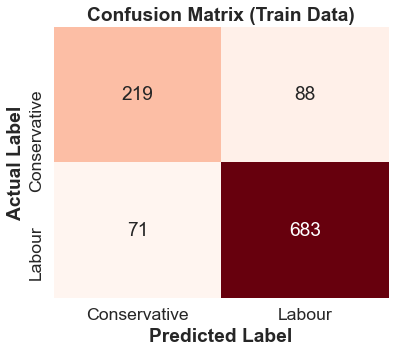

In [262]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

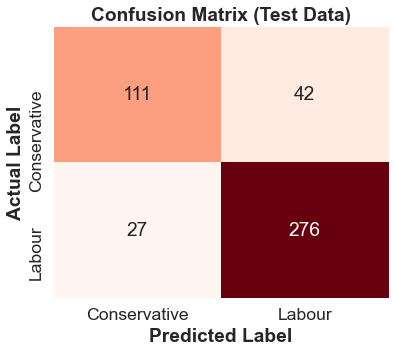

In [263]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [264]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.76      0.71      0.73       307
      Labour       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



In [265]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.80      0.73      0.76       153
      Labour       0.87      0.91      0.89       303

    accuracy                           0.85       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.85      0.85       456
 



C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


AUC: 0.917


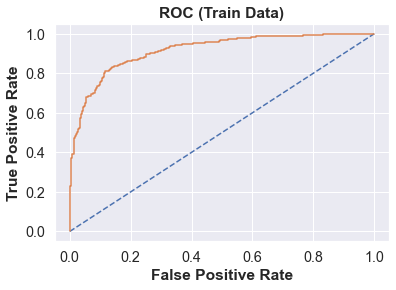

In [266]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


AUC: 0.898


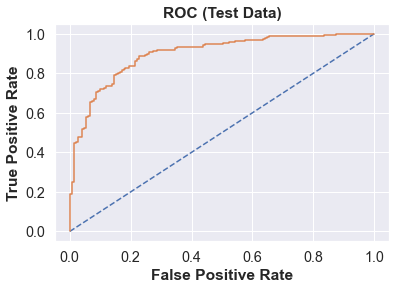

In [267]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)